In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

In [3]:
X.shape

(506, 13)

In [78]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## GD for linear regression

In [120]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    
    

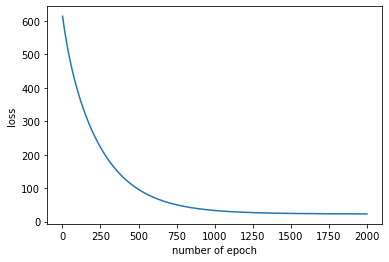

In [121]:
w,b=gradient_descent(X_transform,Y)


In [122]:
print("weight:",w)
print("bias:",b)

weight: [-0.67002925  1.14151238 -0.43347128  0.8059298  -0.58690455  3.19475799
 -0.79964015 -2.97590072  1.0646441  -1.24010715 -1.35323892  0.93901686
 -3.28280848]
bias: 22.12175328966187


# predict


In [126]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [127]:
y_pred=predict(X_transform)
y_pred

array([29.85134607, 23.72693612, 30.01992523, 28.64603105, 28.00605601,
       24.64436739, 21.61235073, 17.86671273, 10.03581506, 17.32090894,
       17.64088476, 19.81732607, 20.43012056, 20.1364606 , 19.41271264,
       19.94964662, 21.92894913, 17.32703425, 17.19506908, 18.73739137,
       12.53651495, 17.7881762 , 16.33789895, 13.89804692, 15.80420209,
       13.44638043, 15.51964309, 15.06613685, 19.85960709, 21.46141073,
       11.79912351, 17.8995726 ,  9.88073218, 14.28921694, 13.98282507,
       22.96859898, 21.72053463, 22.95569693, 23.2589709 , 31.61232355,
       34.81172048, 28.50543146, 25.19634592, 24.75307004, 22.13388559,
       21.19638385, 19.86958562, 16.47678453,  7.58501675, 15.87354726,
       20.10534303, 22.14224963, 27.07512202, 23.28248267, 16.8129638 ,
       31.36049952, 25.01695135, 31.725252  , 21.4955588 , 20.22240024,
       16.59003367, 16.64558621, 22.77439958, 22.50283335, 23.13004967,
       29.72030816, 24.48900808, 20.97169947, 16.94601404, 20.35

In [129]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,29.9
1,21.6,23.7
2,34.7,30.0
3,33.4,28.6
4,36.2,28.0
...,...,...
501,22.4,24.8
502,20.6,23.0
503,23.9,28.3
504,22.0,26.8


# sklearn

In [106]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [107]:
model.intercept_

array([22.53535865])

In [108]:
model.coef_

array([-0.87316695,  0.94479976, -0.17075923,  0.76087482, -1.84854167,
        2.74282926, -0.06265806, -2.98256187,  1.85530626, -1.23402982,
       -2.00594165,  0.86604421, -3.69866087])

In [123]:
w

array([-0.67002925,  1.14151238, -0.43347128,  0.8059298 , -0.58690455,
        3.19475799, -0.79964015, -2.97590072,  1.0646441 , -1.24010715,
       -1.35323892,  0.93901686, -3.28280848])